# **频繁模式与关联规则挖掘**

*陈星奎 3120230922* 

作业要求： 1、数据获取与预处理 2、频繁模式挖掘 3、模式命名 4、挖掘结果分析及可视化展示

本次报告由jupyter notebook导出，对两个数据集的频繁模式进行分析。

本次作业选择的数据集为
- **1. [High-energy physics theory citation network](https://snap.stanford.edu/data/cit-HepTh.html)**

- **2. [yelp dataset](https://www.yelp.com/dataset/download)**

代码仓库地址：
<https://github.com/Hannew-Kui/PatternMining-Homework>

In [1]:
#引入外部模块
import json
from efficient_apriori import apriori
from patternanalysis import *

### **数据集1**：[High-energy physics theory citation network](https://snap.stanford.edu/data/cit-HepTh.html)

该数据集为Arxiv HEP-TH（高能物理理论）引文图，涵盖了27,770篇论文和352,807条边。如果论文 i 引用了论文 j，则该图包含从 i 到 j 的有向边。如果一篇论文引用了数据集之外的论文，或者被数据集之外的论文引用，则图表不包含任何与此相关的信息。

数据涵盖1993年1月至2003年4月（124个月）期间的论文。它始于arXiv成立后的几个月内，因此基本上代表了其HEP-TH部分的完整历史。

#### **数据预处理**

原始数据以边保存引用关系，将其转换为稀疏矩阵的数据结构b并存储,以便使用。

In [2]:
edge2Matrix("./cit-HepTh.txt")

finished!


In [3]:
#加载数据
dataset=loadMatrix("./cit-HepTh.json")

finished!


#### **频繁模式挖掘**

此处使用Apriori算法进行频繁模式挖掘。Apriori算法是关联规则挖掘算法，也是最经典的算法。它利用逐层搜索的迭代方法找出数据库中项集的关系，以形成规则，其过程由连接与剪枝组成。此处调用了第三方库efficient_apriori，其中已有Aprior算法的高效实现。

In [4]:
minsup=0.05       #支持度阈值
minconf=0.7       #置信度阈值
freqItemSet, rules = apriori(dataset, minsup, minconf)
print(freqItemSet)
print()
print(rules)

{1: {('9407087',): 1299, ('9711200',): 2414, ('9802109',): 1641, ('9802150',): 1775}, 2: {('9711200', '9802109'): 1561, ('9711200', '9802150'): 1655, ('9802109', '9802150'): 1566}, 3: {('9711200', '9802109', '9802150'): 1505}}

[{9802109} -> {9711200}, {9802150} -> {9711200}, {9802150} -> {9802109}, {9802109} -> {9802150}, {9802109, 9802150} -> {9711200}, {9711200, 9802150} -> {9802109}, {9711200, 9802109} -> {9802150}, {9802150} -> {9711200, 9802109}, {9802109} -> {9711200, 9802150}]


#### **挖掘结果分析**

将挖掘得到的频繁项集可视化后进行分析，调用函数showFreqItemSet(freqItemSet,totals,title)，其中freqItemSet为频繁项集；totals为数据集长度，用于计算支持度；title为图标题。

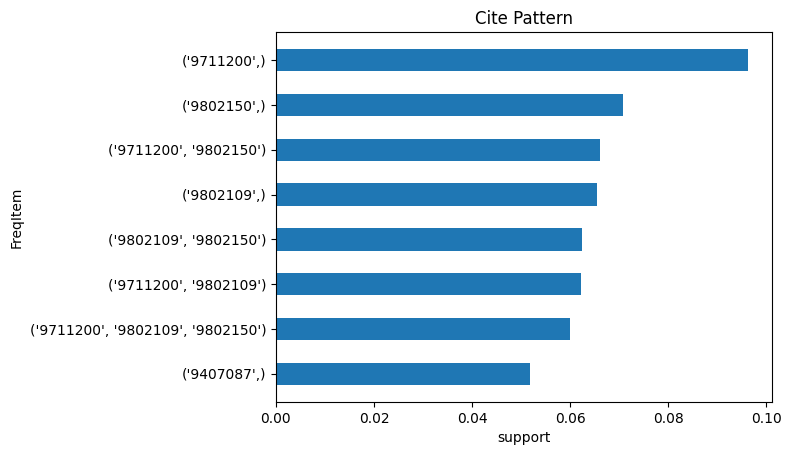

In [5]:
#频繁项集可视化
showFreqItemSet(freqItemSet,len(dataset),title="Cite Pattern")

该模式可命名为**引用模式**，从图中可以看出论文9711200、9802150和9802109这三篇文章的被引量非常大，并且这三篇文章同时被引的概率也非常高，说明这三篇文章在该领域具有相当高的参考价值，并且这三篇文章的工作应该高度相关。

调用showRules进行关联规则分析，其中rules为关联规则数据，title为图标题。

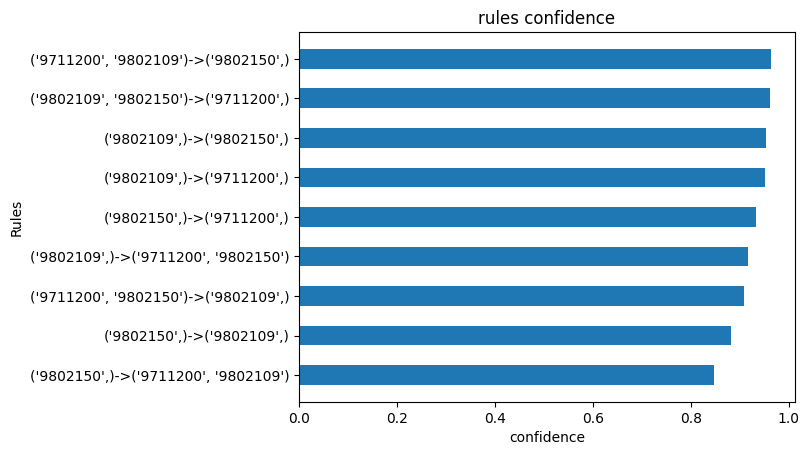

In [6]:
#关联规则分析
showRules(rules,"Cite Rules")

可以看到9711200、9802109和9802150三篇文章之间的关联置信度非常高，说明如果某文章引用了这三篇文章中的其中一篇，大概率也会引用其他两篇。

### **数据集2**：[Yelp business dataset](https://www.yelp.com/dataset/download)

Yelp是美国著名商户点评网站，创立于2004年，囊括各地餐馆、购物中心、酒店、旅游等领域的商户，用户可以在Yelp网站中给商户打分，提交评论，交流购物体验等。在Yelp中搜索一个餐厅或者旅馆，能看到它的简要介绍以及网友的点论，点评者还会给出多少星级的评价，通常点评者都是亲身体验过该商户服务的消费者，评论大多形象细致。本次报告选取其中的商业信息数据集进行分析。

#### **数据预处理**

这里主要挖掘商户中category的频繁模式，但由于其中商业类别较多，包含餐馆、酒店、医疗等，本次从中集中选取category中包含餐馆Restaurants进行分析，同时加上一些限定条件以结合其他属性进行分析。调用函数yelpcategory(path,condition), 其中path为yelp商业数据集路径，condition为条件判别式字符串。在挖掘餐馆类别模式外，还另外添加了两个带有限制条件的数据：高评分stars和高浏览量review_count

In [7]:
yelp_path="./yelp_dataset/yelp_academic_dataset_business.json"
header=['business_id', 'name', 'city', 'state', 'stars', 'review_count', 'attributes', 'categories']

#预处理，其中data为原数据中的一条事务数据
yelpdata=yelpcategory(yelp_path)

finished!


In [8]:
#筛选高评分
yelpdata_stars=yelpcategory(yelp_path,'data["stars"]>4.0')

finished!


In [9]:
#筛选高浏览量
yelpdata_rev=yelpcategory(yelp_path,'data["review_count"]>200')            

finished!


#### **频繁模式挖掘**

此处依旧使用Aprior算法进行频繁模式和关联规则挖掘。此处的支持度和置信度阈值分别为0.1和0.7。

In [11]:
minsup=0.1       #支持度阈值
minconf=0.7      #置信度阈值
freqItemSet, rules = apriori(yelpdata, minsup, minconf)
print(freqItemSet)
print()
print(rules)

{1: {('Food',): 15472, ('Burgers',): 5636, ('Fast Food',): 6472, ('Sandwiches',): 8366, ('Bars',): 8337, ('American (Traditional)',): 8139, ('Nightlife',): 8723, ('Breakfast & Brunch',): 6239, ('Pizza',): 7093, ('American (New)',): 6097}, 2: {('Bars', 'Nightlife'): 8337}}

[{Nightlife} -> {Bars}, {Bars} -> {Nightlife}]


In [12]:
minsup=0.1       #支持度阈值
minconf=0.7      #置信度阈值
freqItemSet_star, rules_star = apriori(yelpdata_stars, minsup, minconf)
print(freqItemSet_star)
print()
print(rules_star)

{1: {('Food',): 4349, ('Coffee & Tea',): 1121, ('Cafes',): 1055, ('Bars',): 1221, ('Nightlife',): 1288, ('American (New)',): 1015, ('Sandwiches',): 1754, ('Breakfast & Brunch',): 1340}, 2: {('Bars', 'Nightlife'): 1221, ('Coffee & Tea', 'Food'): 1121}}

[{Nightlife} -> {Bars}, {Bars} -> {Nightlife}, {Coffee & Tea} -> {Food}]


In [13]:
minsup=0.1       #支持度阈值
minconf=0.7     #置信度阈值
freqItemSet_rev, rules_rev = apriori(yelpdata_rev, minsup, minconf)
print(freqItemSet_rev)
print()
print(rules_rev)

{1: {('American (New)',): 1328, ('American (Traditional)',): 1254, ('Nightlife',): 1930, ('Bars',): 1867, ('Food',): 1666, ('Breakfast & Brunch',): 1091, ('Sandwiches',): 721, ('Seafood',): 796}, 2: {('American (New)', 'Bars'): 711, ('American (New)', 'Nightlife'): 727, ('American (Traditional)', 'Bars'): 641, ('American (Traditional)', 'Nightlife'): 660, ('Bars', 'Nightlife'): 1867}, 3: {('American (New)', 'Bars', 'Nightlife'): 711, ('American (Traditional)', 'Bars', 'Nightlife'): 641}}

[{Nightlife} -> {Bars}, {Bars} -> {Nightlife}, {American (New), Nightlife} -> {Bars}, {American (New), Bars} -> {Nightlife}, {American (Traditional), Nightlife} -> {Bars}, {American (Traditional), Bars} -> {Nightlife}]


#### **挖掘结果分析**

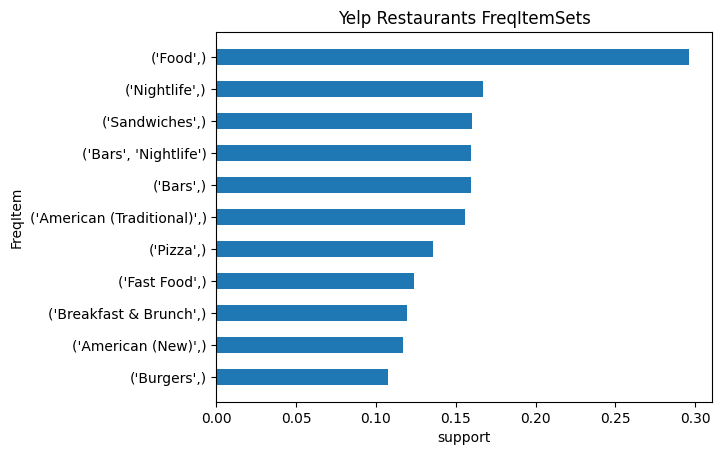

In [22]:
showFreqItemSet(freqItemSet,len(yelpdata),"Yelp Restaurants FreqItemSets")

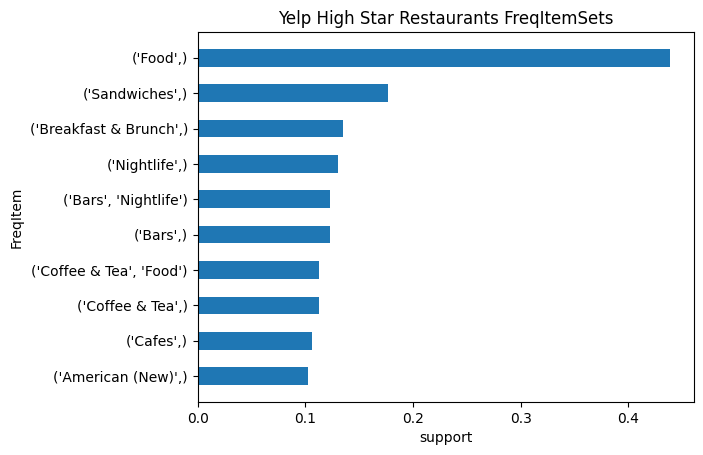

In [24]:
showFreqItemSet(freqItemSet_star,len(yelpdata_stars),"Yelp High Star Restaurants FreqItemSets")

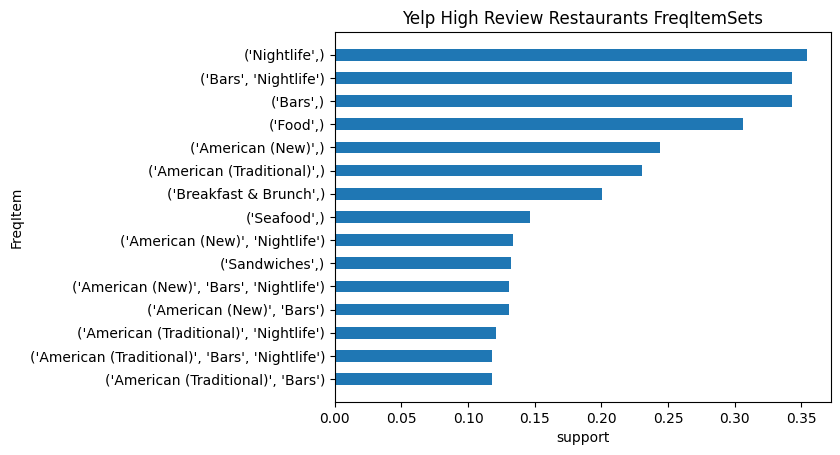

In [20]:
showFreqItemSet(freqItemSet_rev,len(yelpdata_rev),"Yelp High Review Restaurants FreqItemSets")

从中可以看出：大多经营餐馆的商户的类别中也有'Food'标签，除此之外，('Bar','Nightlife')项均存在于三个频繁项集中，说明美国酒吧和夜生活息息相关。此外，在高评分频繁项集和原餐馆频繁项集中('Sandwiches')支持度较高，但在高浏览频繁项集中('American(New)')支持度较高，说明高评分的餐馆大多包含Sandwiches服务，而高浏览量的餐厅大多提供新美式风格服务。

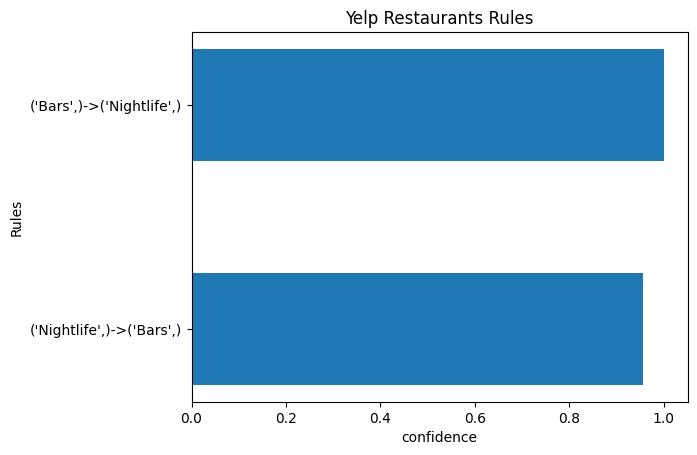

In [23]:
showRules(rules,"Yelp Restaurants Rules")

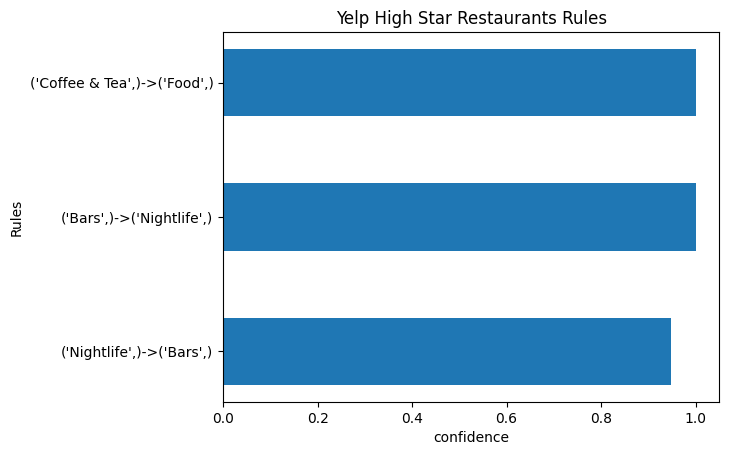

In [25]:
showRules(rules_star,"Yelp High Star Restaurants Rules")

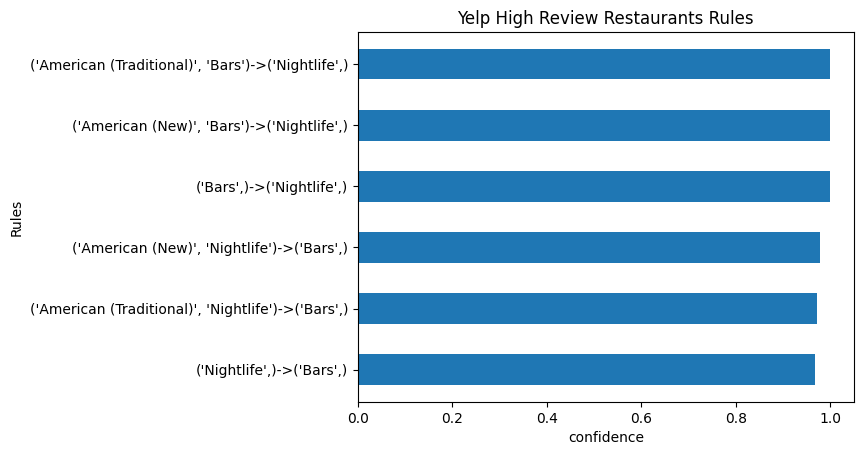

In [21]:
showRules(rules_rev,"Yelp High Review Restaurants Rules")

从中可以看出：在所有餐馆频繁项集中'Bar'和'Nightlife'项几乎同时出现；此外，在高评分关联规则中，{Coffee & Tea} -> {Food}置信度较高，说明高评分的茶饮行业也会提供食品服务；而在高浏览频繁项集中除了Bar和Nightlife，还出现了餐馆的风格，说明用户在浏览的同时也会关注该餐馆服务的风格。

### **小结**

本次报告分析了两个数据集的频繁项集和关联规则，使用了Apriori算法，未来可从频繁子序列、频繁图、更高效的模式挖掘算法进行研究，从而提高模式挖掘的效率。